In [69]:
import numpy as np

import torch   

In [1]:
print("안녕하세요")
print("점심입니다.")


안녕하세요
점심입니다.


# 1. 파이썬 기초

In [4]:

x = torch.tensor([1, 3, 4,6 ])
y = 3 * x + 2
print(y)
print(y.numpy())

tensor([ 5, 11, 14, 20])
[ 5 11 14 20]


In [11]:
x = torch.tensor([1,2,3,4,5]).float()
y = torch.tensor([3, 4, 8, 10, 12 ])

# RMSE 계산
h = 2 * x + 1 
print(h)


rmse1 = torch.sum(torch.abs(y - h )) / 5
rmse1 = torch.mean(torch.abs(y - h ))
print(rmse1)
rmse1 =  torch.sqrt(torch.mean((y - h)**2))
print(rmse1)

# RMSE 계산
h2 = 2.5*x + 1.2
rmse2 =  torch.sqrt(torch.mean((y - h2)**2))
print(rmse2)

tensor([ 3.,  5.,  7.,  9., 11.])
tensor(0.8000)
tensor(0.8944)
tensor(1.4248)


# 직선의 방정식

In [63]:
x = torch.tensor([1, 3, 4,6 ])
y = 3 * x + 2
print(y)
print(x.dtype)

tensor([ 5, 11, 14, 20])
torch.int64


In [64]:
x = torch.tensor([1, 3, 4,6.0 ])
y = 3 * x + 2
print(y)
print(x.dtype)

tensor([ 5., 11., 14., 20.])
torch.float32


In [65]:
x = torch.FloatTensor([1, 3, 4,6 ])
y = 3 * x + 2
print(y)
print(x.dtype)

tensor([ 5., 11., 14., 20.])
torch.float32


# RMSE 계산

In [88]:
x = torch.FloatTensor([1,2,3,4,5])
y = torch.FloatTensor([3, 4, 8, 10, 12 ])

# RMSE 계산
h = 2 * x + 1 
print(h)

rmse1 = torch.sum(torch.abs(y - h )) / 5
rmse1 = torch.mean(torch.abs(y - h ))
print(rmse1)

rmse1 =  torch.sqrt(torch.mean((y - h)**2))


# RMSE 계산
h2 = 2.5*x + 1.2
rmse2 =  torch.sqrt(torch.mean((y - h2)**2))
print(rmse2)

tensor([ 3.,  5.,  7.,  9., 11.])
tensor(0.80000)
tensor(1.42478)


# 역행렬

In [16]:
a = torch.tensor([ [1,2], 
             [3,4] ] ).float()
print(a)

inv = torch.inverse(a)
print(inv)

print(inv * a)
print(torch.matmul(inv, a))   #I*A = A

tensor([[1., 2.],
        [3., 4.]])
tensor([[-2.0000,  1.0000],
        [ 1.5000, -0.5000]])
tensor([[-2.0000,  2.0000],
        [ 4.5000, -2.0000]])
tensor([[ 1.0000e+00,  0.0000e+00],
        [-5.9605e-08,  1.0000e+00]])


In [18]:
x = [1, 2]
y = [3, 5]   # y=2x + 1 

A = torch.tensor(
    [[1,1 ],
    [2, 1]]).float()

Y = torch.tensor([[4.6],
              [20.4]]).float()

print(Y)
W = torch.matmul(torch.inverse(A) , Y)
print(W[0], W[1])
print(W[0].item(), W[1].item())

tensor([[ 4.6000],
        [20.4000]])
tensor([15.8000]) tensor([-11.2000])
15.799999237060547 -11.199999809265137


In [20]:
x = [1, 2, 3]
y = [3, 5, 8]   # y=2x + 1 

A = torch.tensor(
    [[1,1.0 ],
    [2, 1],
    [3,1]]).float()

Y = torch.tensor([[3],
              [5],
              [8]]).float()

print(Y)   
W = torch.matmul(torch.pinverse(A) , Y)
print(W[0], W[1])

tensor([[3.],
        [5.],
        [8.]])
tensor([2.5000]) tensor([0.3333])


In [30]:
torch.exp(   torch.tensor(1)   )   #  2.7^0=1

x = torch.tensor([-200, -5, -4 -3,-2, -1, 0, 1, 2, 3, 4, 5, 200]).float()
#x = torch.tensor([-5, 5, 0.1]).float()
sig = 1 / (  1 + torch.exp(-x))
print(sig)

tensor([0.0000e+00, 6.6929e-03, 9.1105e-04, 1.1920e-01, 2.6894e-01, 5.0000e-01,
        7.3106e-01, 8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 1.0000e+00])


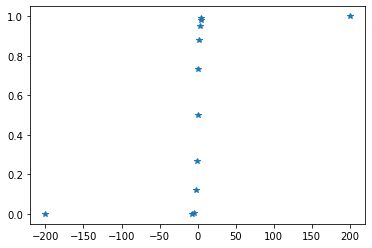

In [31]:
import matplotlib.pyplot as plt
plt.plot(x , sig, '*')

tensor(0.26894)
tensor(1.05500e-05)
0.10550022


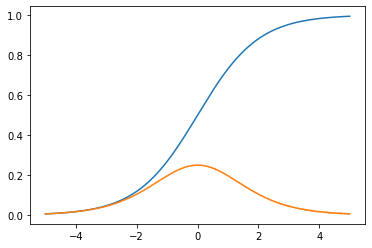

In [61]:
torch.set_printoptions(precision=5)

def sigmoid(x) :
  return  1 / (  1 + torch.exp(-x))

print(sigmoid(torch.tensor(-1) ))

#x가 2이 곳에서 미분값을 계산하시오.


delta = 1e-4
f = sigmoid(torch.tensor(2+ delta)) - sigmoid(torch.tensor(2)) 
print(f)
d = f / delta
print(d.numpy())


x = torch.linspace(-5, 5, 1000)

dx = (sigmoid(x+ delta) - sigmoid(x))  /  (delta)
#print(dx)

plt.plot(x, sigmoid(x))
plt.plot(x, dx)

In [47]:
#회사 A  10km   12000 ,    11km   12600    12km   13300
#회사 B  10km   10000      11km   11000    12km   11500
#CEO 20km 갈건데 어느 회사를 이용하면 좋을까?

#1. A회사의 모델 y = wx + b
#2. b회사의 모델 y2 = w2x + b2
#3 . x=20,  y, y2를 계산  

A  = torch.tensor([[10, 1],
     [11, 1],
     [12, 1]]).float()
Y_A = torch.tensor([[12000],
      [12600],
      [13300]]).float()
Y_B = torch.tensor([[10000],
      [11000],
      [11500]]).float()

inv = torch.pinverse(A)
W_A = torch.matmul(inv,  Y_A )
W_B = torch.matmul(inv,  Y_B )

print(W_A)  # 단위시간당(거리) 변화량       1km당 650입니다. 기본요금 5483원
print(W_B)  # 단위시간당(거리) 변화량       1km당 750입니다. 기본요금 2583원 

x = 20
cost_A = W_A[0]*x + W_A[1]
cost_B = W_B[0]*x + W_B[1]
print(cost_A,  cost_B)


#650*x + 5483 = 750*x + 2538 
#X계산, y

tensor([[ 650.0000],
        [5483.3359]])
tensor([[ 750.0000],
        [2583.3359]])
tensor([18483.3359]) tensor([17583.3359])
